<H1> Improving Model by Adding Dropout </H1>

If you look at the model training log above, you'll see that the validation loss is increasing significantly, indicating that our model is overfitting.

Overfitting means our model performs well on the training dataset but fails to generalize to new, unseen data. Let's work on reducing this overfitting.

Now that we have established a baseline model using the VGG architecture with three blocks, we can explore changes to the model and training algorithm to improve performance. We will focus on two main areas to address the severe overfitting: regularization and data augmentation.

<H1> Loading Libraries </H1>

In [2]:
# keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# visuals
import matplotlib.pyplot as plt

<H1>Data Preparation:</H1>

The Cifar10 dataset is loaded and split into training and testing sets.
The images are reshaped to include three channels (color) and normalized to the range [0, 1].
Labels are one-hot encoded to match the output layer of the network.

In [3]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

<H1> Adding Dropout: </H1>

Let's regularize the model using dropout, a very effective regularization technique in deep learning.

What is dropout?

Dropout is a method that approximates training multiple neural networks with different architectures simultaneously.

We will add dropout layers after each max pooling layer and after the fully connected layer, using a fixed dropout rate of 20%.

In [9]:
# declare some important variables
BATCH_SIZE = 64
EPOCHS = 50

In [10]:
# Define the CNN model
simple_model = models.Sequential()

# 3 block vgg style model 
# Base of the model

# block 1
simple_model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape = (32,32,3)))
simple_model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
simple_model.add(layers.MaxPooling2D((2, 2)))
simple_model.add(layers.Dropout(0.2))   # Add dropout to reduce overfitting

# block 2
simple_model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
simple_model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
simple_model.add(layers.MaxPooling2D((2, 2)))
simple_model.add(layers.Dropout(0.2))   # Add dropout to reduce overfitting

# block 3
simple_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
simple_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
simple_model.add(layers.MaxPooling2D((2, 2)))
simple_model.add(layers.Dropout(0.2))   # Add dropout to reduce overfitting

# head of the model
simple_model.add(layers.Flatten())
simple_model.add(layers.Dense(128, activation='relu'))
simple_model.add(layers.Dropout(0.2))   # Add dropout to reduce overfitting
simple_model.add(layers.Dense(10, activation='softmax'))

In [6]:
simple_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

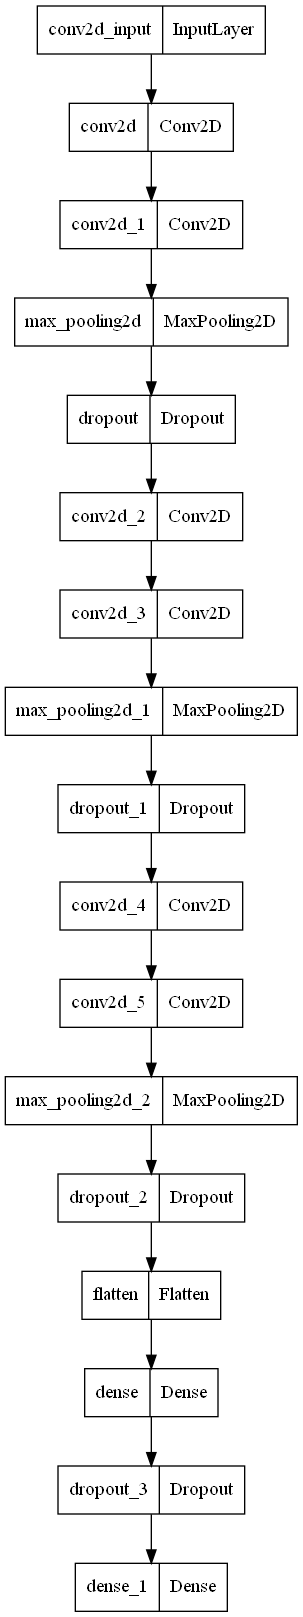

In [7]:
plot_model(simple_model)

<H1> Model Training: </H1>

The model is compiled with the Adam optimizer and categorical cross-entropy loss function.
The fit function trains the model using the training data and evaluates it on the test data for EPOCHS epochs with a batch size of BATCH_SIZE

In [11]:
# Compile the model
simple_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_train = simple_model.fit(X_train, y_train, 
                            validation_data=(X_train, y_train), 
                            epochs=EPOCHS, 
                            batch_size=BATCH_SIZE
                            )


Epoch 1/50
782/782 [==============================] - 6s 7ms/step - loss: 1.7179 - accuracy: 0.3618 - val_loss: 1.3392 - val_accuracy: 0.5091
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 1.2263 - accuracy: 0.5586 - val_loss: 0.9978 - val_accuracy: 0.6460
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 1.0331 - accuracy: 0.6309 - val_loss: 0.8691 - val_accuracy: 0.6947
Epoch 4/50
782/782 [==============================] - 5s 7ms/step - loss: 0.9213 - accuracy: 0.6749 - val_loss: 0.7708 - val_accuracy: 0.7282
Epoch 5/50
782/782 [==============================] - 5s 7ms/step - loss: 0.8468 - accuracy: 0.7025 - val_loss: 0.6733 - val_accuracy: 0.7642
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 0.7773 - accuracy: 0.7269 - val_loss: 0.6808 - val_accuracy: 0.7601
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 0.7267 - accuracy: 0.7456 - val_loss: 0.5689 - val_accuracy: 0.7994
Epoch 

In [12]:
def myplot( hist ):
    # summarize history for accuracy
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title("Accuracy by VGG3 on CIFAR-10 Data")
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss by VGG3 on CIFAR-10 Data')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'])
    plt.show()

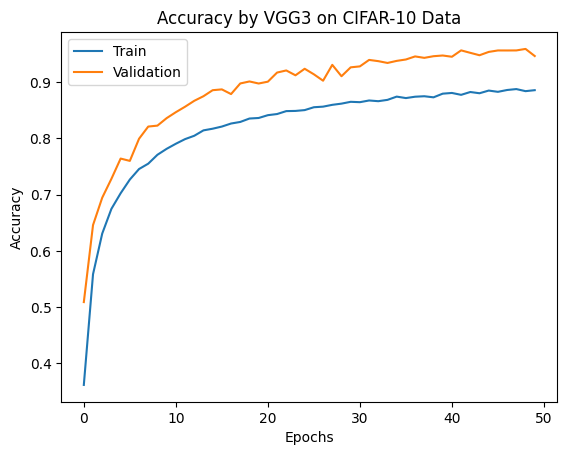

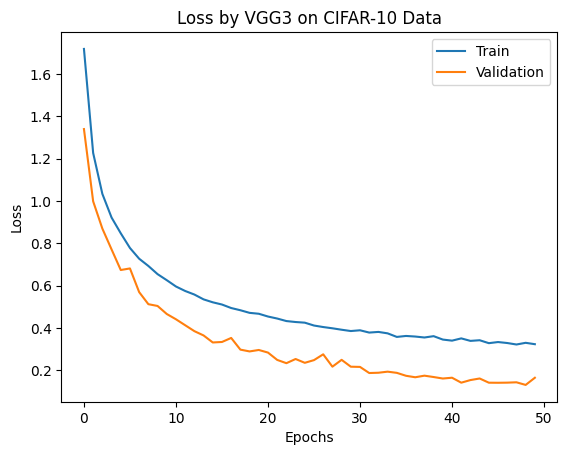

In [13]:
myplot(hist_train)

In [14]:
simple_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6419 - accuracy: 0.8048


[0.6419479846954346, 0.8047999739646912]